# Census Income Project

# Data Description

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.


Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:


* A single cell estimate of the population 16+ for each state.


* Controls for Hispanic Origin by age and sex.


* Controls by Race, age and sex.


We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

## Importing Libraries

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import warnings
warnings.filterwarnings('ignore')

## Loading Dataset

In [108]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [109]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [110]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [112]:
# Dimension of the dataset
df.shape

(32560, 15)

In [113]:
#Statistical summary
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [114]:
# Checking the null values of the dataset
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

* We can observe that there is no null values in the dataset.

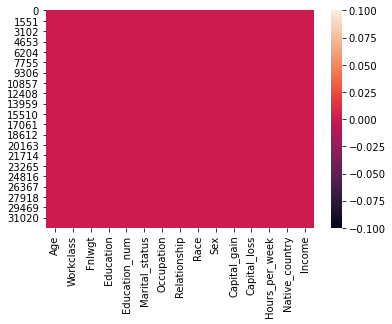

In [115]:
sns.heatmap(df.isnull())

## EDA

In [116]:
df.drop('Fnlwgt',axis=1,inplace=True)

In [117]:
df.head(2)

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [118]:
df['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

* In the column Workclass 1836 unknown values are there.

In [119]:
df['Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

In [120]:
df['Education_num'].value_counts()

9     10501
10     7291
13     5354
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: Education_num, dtype: int64

In [121]:
df['Marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

In [122]:
df['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

* The column Occupation contains 1843 unknown values.

In [123]:
df['Relationship'].value_counts()

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

In [124]:
df['Race'].value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

In [125]:
df['Sex'].value_counts()

 Male      21789
 Female    10771
Name: Sex, dtype: int64

In [126]:
df['Native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [127]:
df['Native_country'].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

* This column contains 583 unknown values.

In [128]:
df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

In [129]:

df=df.replace(' ?',np.nan)

In [130]:
#Checking the null values

In [131]:
df.isnull().sum()

Age                  0
Workclass         1836
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

Lets create a heatmap of missing values for more clarity.


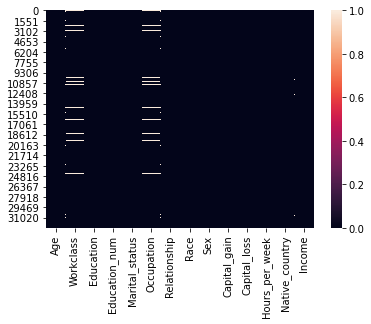

In [132]:
sns.heatmap(df.isnull())

* We can observe that null values are present in the columns workclass,marital_status and Native_country

## Data Visualization

### Univariate Analysis

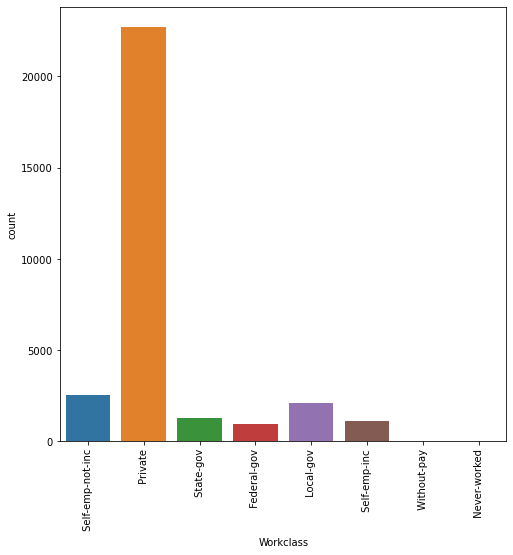

In [133]:
plt.figure(figsize=(8,8))
plt.xticks(rotation=90)

sns.countplot(df['Workclass'])
plt.show()

* observation: Workers in the private field is maximum in number.Federal-gov employees are less in number.

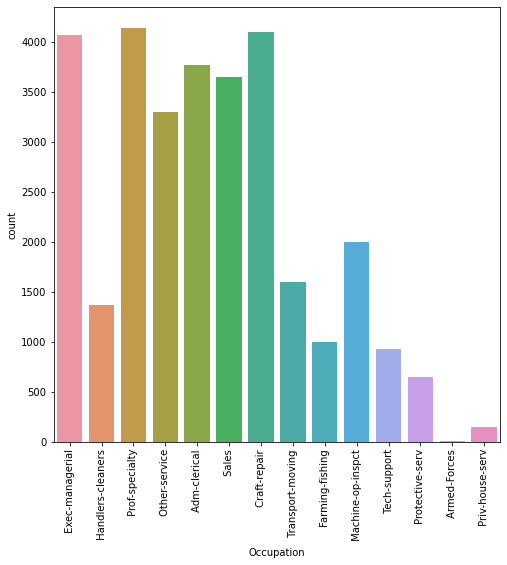

In [134]:
plt.figure(figsize=(8,8))
plt.xticks(rotation=90)
sns.countplot(df['Occupation'])
plt.show()

* Workers having the occupation Prof-speciality is maximum in number.

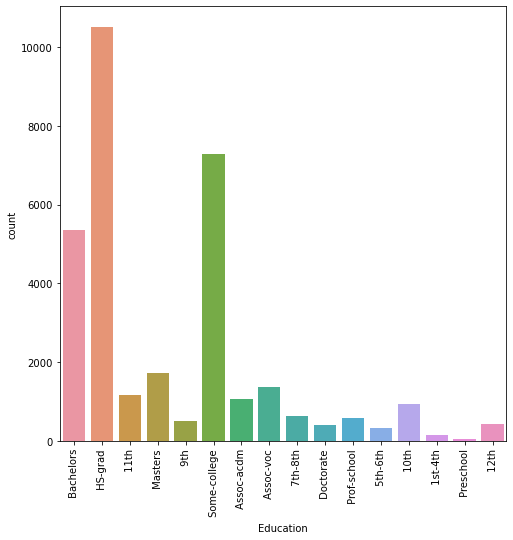

In [135]:
plt.figure(figsize=(8,8))
plt.xticks(rotation=90)
sns.countplot(df['Education'])
plt.show()

* Workers having the education HS-grad is maximum in number.

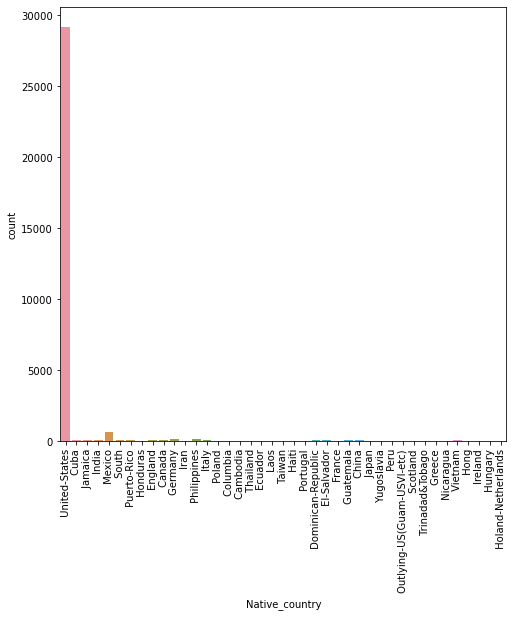

In [136]:
plt.figure(figsize=(8,8))
plt.xticks(rotation=90)
sns.countplot(df['Native_country'])
plt.show()

* Most of the employees belongs to United-States.

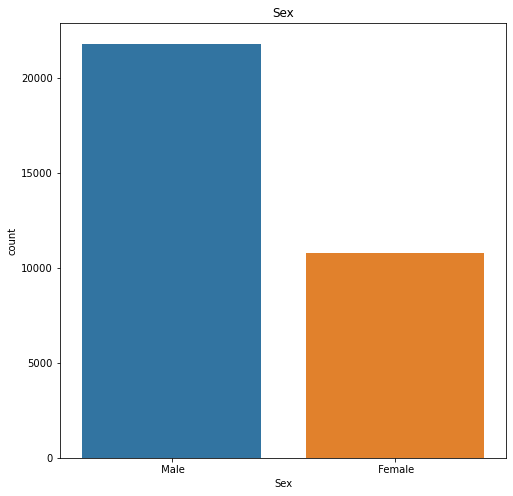

In [137]:
plt.figure(figsize=(8,8))
sns.countplot(df['Sex'])
plt.title('Sex')
plt.show()

* Male workers are more compared to female workers.

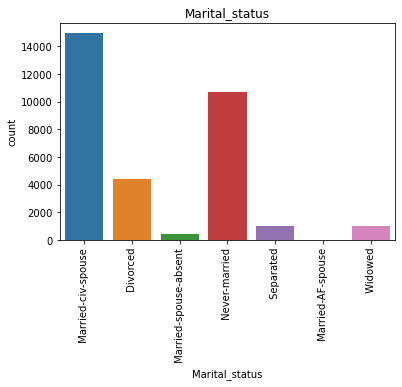

In [138]:
plt.xticks(rotation=90)
sns.countplot(df['Marital_status'])
plt.title('Marital_status')
plt.show()

* Most of workers are married civilian spouse. Married Af spouses are minimum in number.

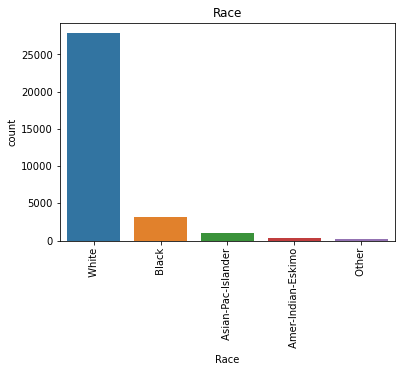

In [139]:
plt.xticks(rotation=90)
sns.countplot(df['Race'])
plt.title('Race')
plt.show()

* White people are maximum in number.Second most are black people.

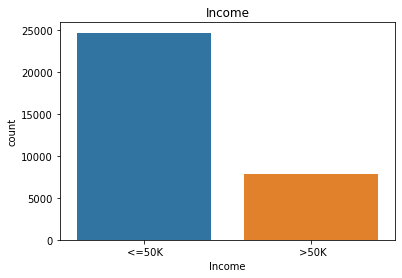

In [140]:
sns.countplot(df['Income'])
plt.title('Income')
plt.show()

* Most of the worker's yearly income is <=50k $

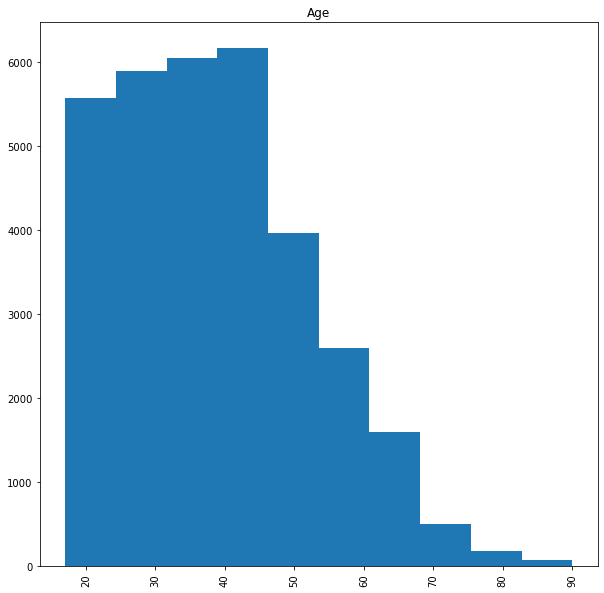

In [141]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
plt.title('Age')
plt.hist(df['Age'])
plt.show()

* most of the employees are between the age 20 to 50.

### Bivariate Analysis

In [142]:
workclass_age=df.groupby("Workclass")["Age"].agg(["count","mean"])
workclass_age

,count,mean
Workclass,,
Federal-gov,960,42.590625
Local-gov,2093,41.751075
Never-worked,7,20.571429
Private,22696,36.797585
Self-emp-inc,1116,46.017025
Self-emp-not-inc,2541,44.969697
State-gov,1297,39.436392
Without-pay,14,47.785714


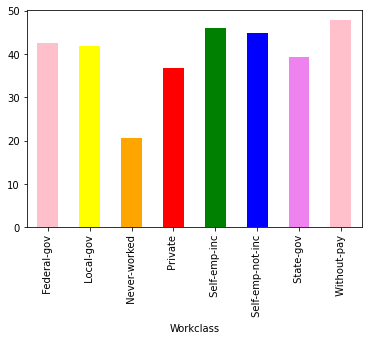

In [143]:
colors=['Pink','Yellow','Orange','Red','Green','Blue','Violet']
workclass_age['mean'].plot.bar(color=colors)

* The average age of private employees are 37.Around 14 percent people are working without any payment.
  People up to the age 20 never worked.we know that usually students start working from the age of 22.

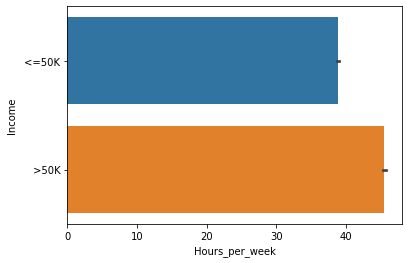

In [144]:
sns.barplot(x='Hours_per_week',y='Income',data=df)
plt.xlabel('Hours_per_week')
plt.ylabel('Income')
plt.show()

The people who worked more hours in weeks earns more.

In [145]:
education_sex=df.groupby(["Education","Sex"])["Sex"].count()
education_sex

Education      Sex    
 10th           Female     295
                Male       638
 11th           Female     432
                Male       743
 12th           Female     144
                Male       289
 1st-4th        Female      46
                Male       122
 5th-6th        Female      84
                Male       249
 7th-8th        Female     160
                Male       486
 9th            Female     144
                Male       370
 Assoc-acdm     Female     421
                Male       646
 Assoc-voc      Female     500
                Male       882
 Bachelors      Female    1619
                Male      3735
 Doctorate      Female      86
                Male       327
 HS-grad        Female    3390
                Male      7111
 Masters        Female     536
                Male      1187
 Preschool      Female      16
                Male        35
 Prof-school    Female      92
                Male       484
 Some-college   Female    2806
                

Text(0.5, 1.0, 'Count')

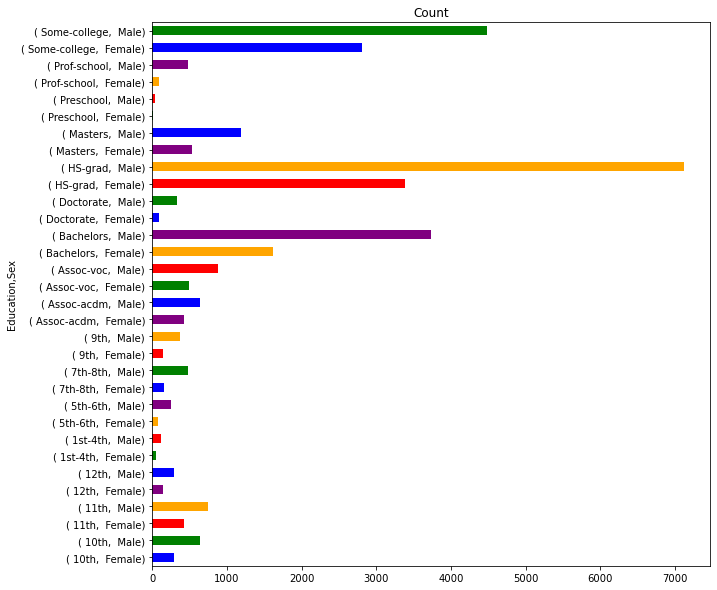

In [146]:
colors=['Blue','Green','Red','Orange','Purple']
plt.figure(figsize=(10,10))
education_sex.plot.barh(color=colors)
plt.title('Count')

* Most of the males have the education HS-grad.Males are more educated than females.Most of the people are well educated.

In [147]:
education_sex_age=df.groupby(['Education','Sex'])['Age'].mean()
education_sex_age

Education      Sex    
 10th           Female    35.447458
                Male      38.346395
 11th           Female    30.546296
                Male      33.407806
 12th           Female    29.756944
                Male      33.117647
 1st-4th        Female    48.521739
                Male      45.245902
 5th-6th        Female    44.369048
                Male      42.385542
 7th-8th        Female    49.693750
                Male      48.034979
 9th            Female    42.131944
                Male      40.643243
 Assoc-acdm     Female    36.361045
                Male      38.046440
 Assoc-voc      Female    37.872000
                Male      38.939909
 Bachelors      Female    35.635578
                Male      40.322088
 Doctorate      Female    45.325581
                Male      48.327217
 HS-grad        Female    38.678171
                Male      39.115736
 Masters        Female    43.074627
                Male      44.490312
 Preschool      Female    41.750000
     

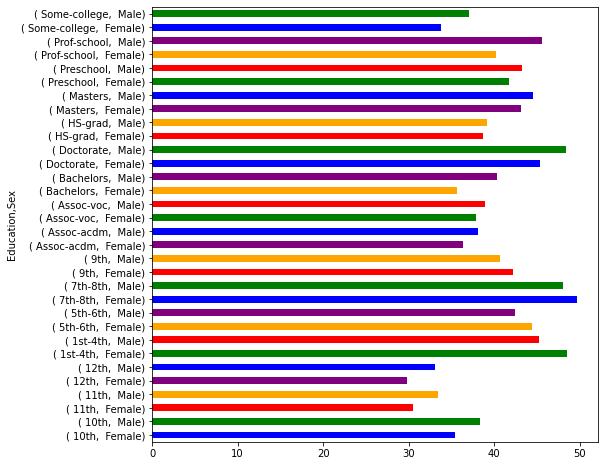

In [148]:
plt.figure(figsize=(8,8))
education_sex_age.plot.barh(color=colors)

In [149]:
# going to drop the column Education,since both the columns Education and Education_count are same.
df.drop('Education',axis=1,inplace=True)

Now we are going to replace the NaN values in the categorical column using most frequent value. 

In [150]:
from sklearn.impute import SimpleImputer

In [151]:
imp=SimpleImputer(strategy='most_frequent')
var=['Workclass','Occupation','Native_country']
for i in var:
    df[i]=imp.fit_transform(df[i].values.reshape(-1,1))

In [152]:
df.isnull().sum()

Age               0
Workclass         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

### Checking correlation

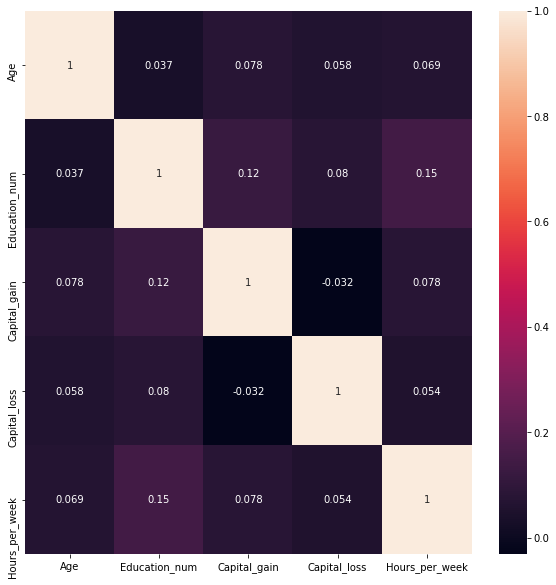

In [153]:
corr_mat=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_mat,annot=True)
plt.show()

Education_num has good correlation with Capital gain and Hours per week.

In [154]:
df.drop('Race',axis=1,inplace=True)
df.drop('Relationship',axis=1,inplace=True)

### Checking Outliers

In [155]:
df_float=df.select_dtypes(include=[np.number])

In [156]:
df_float

,Age,Education_num,Capital_gain,Capital_loss,Hours_per_week
0,50,13,0,0,13
1,38,9,0,0,40
2,53,7,0,0,40
3,28,13,0,0,40
4,37,14,0,0,40
...,...,...,...,...,...
32555,27,12,0,0,38
32556,40,9,0,0,40
32557,58,9,0,0,40
32558,22,9,0,0,20


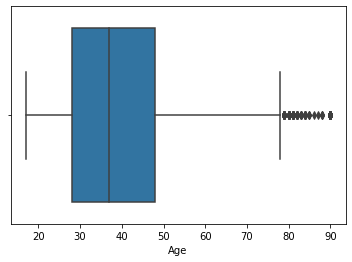

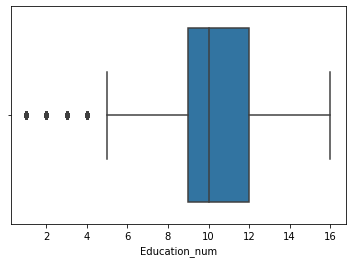

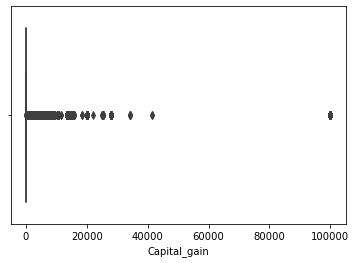

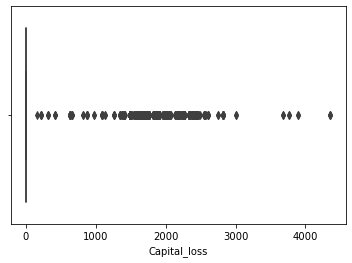

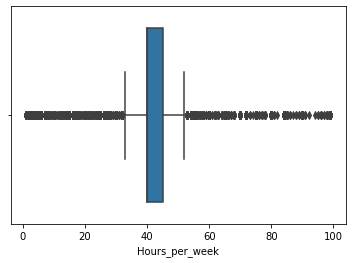

In [157]:
for i in['Age','Education_num','Capital_gain','Capital_loss','Hours_per_week']:
    sns.boxplot(df[i])
    plt.show()


In [158]:
from scipy.stats import zscore
z=np.abs(zscore(df_float))
z

array([[0.83709708, 1.13477863, 0.14591373, 0.21666301, 2.22212013],
       [0.04264043, 0.42002663, 0.14591373, 0.21666301, 0.03542999],
       [1.05703146, 1.19742926, 0.14591373, 0.21666301, 0.03542999],
       ...,
       [1.42358875, 0.42002663, 0.14591373, 0.21666301, 0.03542999],
       [1.21562378, 0.42002663, 0.14591373, 0.21666301, 1.65520046],
       [0.98372   , 0.42002663, 1.88840054, 0.21666301, 0.03542999]])

In [159]:
threshold=3
print(np.where(z>3))

(array([    9,    22,    27, ..., 32524, 32524, 32530], dtype=int64), array([4, 3, 4, ..., 0, 4, 4], dtype=int64))


In [160]:
df_new=df[(z<3).all(axis=1)]

In [161]:
df_new.shape

(30150, 11)

In [162]:
df=df_new

In [163]:
df

,Age,Workclass,Education_num,Marital_status,Occupation,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,13,United-States,<=50K
1,38,Private,9,Divorced,Handlers-cleaners,Male,0,0,40,United-States,<=50K
2,53,Private,7,Married-civ-spouse,Handlers-cleaners,Male,0,0,40,United-States,<=50K
3,28,Private,13,Married-civ-spouse,Prof-specialty,Female,0,0,40,Cuba,<=50K
4,37,Private,14,Married-civ-spouse,Exec-managerial,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,12,Married-civ-spouse,Tech-support,Female,0,0,38,United-States,<=50K
32556,40,Private,9,Married-civ-spouse,Machine-op-inspct,Male,0,0,40,United-States,>50K
32557,58,Private,9,Widowed,Adm-clerical,Female,0,0,40,United-States,<=50K
32558,22,Private,9,Never-married,Adm-clerical,Male,0,0,20,United-States,<=50K


### Distribution of data 

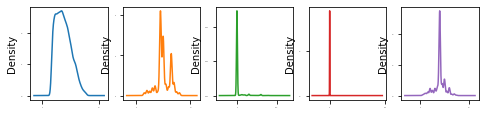

In [164]:
df.plot(kind='density',subplots=True,layout=(6,11),sharex=False,legend=False,fontsize=1,figsize=(18,12))
plt.show()

Conveting categorical columns  to numerical

In [165]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in ["Income","Sex"]:
    df[i]=le.fit_transform(df[i])

In [166]:
df=pd.get_dummies(df,columns=['Occupation','Workclass','Native_country','Marital_status'],prefix=['Occupation','Workclass','Native_country','Marital_status'])

In [167]:
# Seperating the independent and target variables
x=df.drop('Income',axis=1)
y=df['Income']

### Checking Skewness

In [168]:
x.skew()

Age                                       0.494157
Education_num                            -0.171984
Sex                                      -0.681022
Capital_gain                              4.940872
Capital_loss                             29.821934
                                           ...    
Marital_status_ Married-civ-spouse        0.208093
Marital_status_ Married-spouse-absent     8.762548
Marital_status_ Never-married             0.687600
Marital_status_ Separated                 5.287653
Marital_status_ Widowed                   5.576839
Length: 75, dtype: float64

There is no skewness in the dataset.we don't consider the skewness of the categorical columns.

In [169]:
x

,Age,Education_num,Sex,Capital_gain,Capital_loss,Hours_per_week,Occupation_ Adm-clerical,Occupation_ Armed-Forces,Occupation_ Craft-repair,Occupation_ Exec-managerial,...,Native_country_ United-States,Native_country_ Vietnam,Native_country_ Yugoslavia,Marital_status_ Divorced,Marital_status_ Married-AF-spouse,Marital_status_ Married-civ-spouse,Marital_status_ Married-spouse-absent,Marital_status_ Never-married,Marital_status_ Separated,Marital_status_ Widowed
0,50,13,1,0,0,13,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
1,38,9,1,0,0,40,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2,53,7,1,0,0,40,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,28,13,0,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,37,14,0,0,0,40,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,12,0,0,0,38,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
32556,40,9,1,0,0,40,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
32557,58,9,0,0,0,40,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
32558,22,9,1,0,0,20,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [170]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: Income, Length: 30150, dtype: int32

## Scaling the Dataset

In [171]:
from sklearn.preprocessing import StandardScaler

In [172]:
ss=StandardScaler()
x=ss.fit_transform(x)

In [173]:
x

array([[ 0.89109297,  1.19208592,  0.71588492, ..., -0.7136604 ,
        -0.18280871, -0.17389911],
       [-0.00814233, -0.43790911,  0.71588492, ..., -0.7136604 ,
        -0.18280871, -0.17389911],
       [ 1.1159018 , -1.25290663,  0.71588492, ..., -0.7136604 ,
        -0.18280871, -0.17389911],
       ...,
       [ 1.49058317, -0.43790911, -1.39687256, ..., -0.7136604 ,
        -0.18280871,  5.75046056],
       [-1.20712273, -0.43790911,  0.71588492, ...,  1.40122668,
        -0.18280871, -0.17389911],
       [ 1.04096552, -0.43790911, -1.39687256, ..., -0.7136604 ,
        -0.18280871, -0.17389911]])

## Finding the Best Random

In [174]:
maxAccu=0
maxRS=0
for i in range(1,400):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is",maxAccu,"on Random_state",maxRS)        

Best accuracy is 0.8630182421227197 on Random_state 388


## Train-Test Split

In [175]:
X_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=388)

In [176]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((24120, 75), (6030, 75), (24120,), (6030,))

In [177]:
model=[LogisticRegression(),DecisionTreeClassifier(),SVC(),KNeighborsClassifier(),RandomForestClassifier(),GradientBoostingClassifier()]
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('For',m,':')
    print('------------------------------------------')
    print('Accuracy Score')
    print(accuracy_score(y_test,predm))
    print('Confusion matrix')
    print(confusion_matrix(y_test,predm))
    print('Classification Report')
    print(classification_report(y_test,predm))
    print('\n')

For LogisticRegression() :
------------------------------------------
Accuracy Score
0.7837479270315091
Confusion matrix
[[4726    0]
 [1304    0]]
Classification Report
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      4726
           1       0.00      0.00      0.00      1304

    accuracy                           0.78      6030
   macro avg       0.39      0.50      0.44      6030
weighted avg       0.61      0.78      0.69      6030



For DecisionTreeClassifier() :
------------------------------------------
Accuracy Score
0.6782752902155887
Confusion matrix
[[3846  880]
 [1060  244]]
Classification Report
              precision    recall  f1-score   support

           0       0.78      0.81      0.80      4726
           1       0.22      0.19      0.20      1304

    accuracy                           0.68      6030
   macro avg       0.50      0.50      0.50      6030
weighted avg       0.66      0.68      0.67      6030



## Cross Validation

In [178]:
for m in model:
    scr=cross_val_score(m,x,y,cv=5)
    print('Cross validation score of',m,'is:')
    print('Score',scr)
    print('Cross validation score',scr.mean())
    print('Standard deviation',scr.std())
    print('\n')

Cross validation score of LogisticRegression() is:
Score [0.84643449 0.85024876 0.85688226 0.85804312 0.85306799]
Cross validation score 0.8529353233830846
Standard deviation 0.004269985013567851


Cross validation score of DecisionTreeClassifier() is:
Score [0.80945274 0.8159204  0.81094527 0.81824212 0.81442786]
Cross validation score 0.81379767827529
Standard deviation 0.003214681577834393


Cross validation score of SVC() is:
Score [0.84776119 0.85124378 0.85024876 0.85456053 0.85555556]
Cross validation score 0.8518739635157544
Standard deviation 0.002853946900736168


Cross validation score of KNeighborsClassifier() is:
Score [0.83200663 0.83499171 0.83830846 0.84046434 0.84046434]
Cross validation score 0.8372470978441127
Standard deviation 0.0032977899228472246


Cross validation score of RandomForestClassifier() is:
Score [0.84079602 0.84063018 0.84311774 0.84842454 0.84792703]
Cross validation score 0.8441791044776119
Standard deviation 0.003383409733016686


Cross validation

## Hyper Parameter tuning

In [179]:
from sklearn.model_selection import GridSearchCV

In [180]:
# Creating parameter list to pass in GridsearchCV
parameters={'kernel':['linear','poly','rbf','sigmoid'],'degree':[1,10],'gamma':['scale','auto']}

In [181]:
GCV=GridSearchCV(SVC(),parameters,cv=5)

In [182]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'degree': [1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [183]:
GCV.best_params_

{'degree': 1, 'gamma': 'scale', 'kernel': 'linear'}

In [184]:
GCV_pred=GCV.best_estimator_.predict(x_test)

In [185]:
accuracy_score(y_test,GCV_pred)

0.7837479270315091

## Saving Best Model

In [186]:
import pickle
filename='census_income.pkl'
pickle.dump(GCV,open(filename,'wb'))

## Conclusion

In [187]:
loaded_model=pickle.load(open('census_income.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result)

0.7837479270315091


In [188]:
import numpy as np
a=np.array(y_test)
predicted=np.array(GCV.predict(x_test))
df_con=pd.DataFrame({'Original':a,'Predicted':predicted}, index=range(len(a)))

In [192]:
df_con

,Original,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,1,0
...,...,...
6025,0,0
6026,1,0
6027,0,0
6028,0,0
